**CONNECTAR AMB GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**REVISAR TIPO DE GPU ASIGNADA**

In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Mon Jun 27 06:20:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**MÓDULOS CON LOS QUE SE VA A TRABAJAR**

In [ ]:
import numpy as np # Importamos módulo NumPy
import pandas as pd  #Importamos módulo Pandas
import tensorflow as tf #Importamos módulo TensorFlow
from tensorflow import keras #Importamos Keras
from tensorflow.keras.models import Sequential  ## Building Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout ## Building Model
from tensorflow.keras.optimizers import Adam  ## Training Model
from tensorflow.keras.metrics import categorical_crossentropy  ##Training Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os #Importamos el módulo OS
import csv
import shutil
import random
import glob
import matplotlib.pyplot as plt #Importamos el módulo Matplotlib
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# ruta_split_0 = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0"
# cont_split_0 = os.listdir(ruta_split_0)
# print(cont_split_0)
# ruta_csv = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0/split_0.csv"

# df = pd.DataFrame(cont_split_0)
# df.to_csv(ruta_csv, index=False)


#ruta_csv = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0/split_0.csv"
#cont_csv = open(ruta_csv,"w")

#with cont_csv:
  #write = csv.writer(cont_csv)
  #for i in cont_split_0:
    #write.writerows(i)

['04a78ef00c5245e0_12877.jpg', '04a78ef00c5245e0_5640.jpg', '04a78ef00c5245e0_11827.jpg', '04a78ef00c5245e0_12949.jpg', '04a78ef00c5245e0_14145.jpg', '04a78ef00c5245e0_11866.jpg', '04a78ef00c5245e0_12859.jpg', '04a78ef00c5245e0_11629.jpg', '04a78ef00c5245e0_5614.jpg', '04a78ef00c5245e0_13015.jpg', '04a78ef00c5245e0_12885.jpg', '04a78ef00c5245e0_13041.jpg', '04a78ef00c5245e0_11815.jpg', '04a78ef00c5245e0_13063.jpg', '04a78ef00c5245e0_14155.jpg', '04a78ef00c5245e0_11817.jpg', '04a78ef00c5245e0_12895.jpg', '04a78ef00c5245e0_13045.jpg', '04a78ef00c5245e0_11819.jpg', '04a78ef00c5245e0_12951.jpg', '04a78ef00c5245e0_13055.jpg', '04a78ef00c5245e0_12847.jpg', '04a78ef00c5245e0_12861.jpg', '04a78ef00c5245e0_13057.jpg', '04a78ef00c5245e0_11821.jpg', '04a78ef00c5245e0_14121.jpg', '04a78ef00c5245e0_11217.jpg', '04a78ef00c5245e0_11215.jpg', '04a78ef00c5245e0_7669.jpg', '04a78ef00c5245e0_14133.jpg', '04a78ef00c5245e0_12875.jpg', '04a78ef00c5245e0_12935.jpg', '04a78ef00c5245e0_15596.jpg', '04a78ef00c5

**PREPARACIÓ DE LES DADES**

In [ ]:
# Organització de les dades en directoris segons partició 2-folden
### METER CÓDIGO QUE ORDENA EN CARPETAS SPLIT_0 I SPLIT_1





**COMPROBACIÓN DE CANTIDAD DE ARCHIVOS**

In [ ]:
# Asignamos a una variable las rutas de los directorios cuya cantidad de archivos queremos comprobar
ruta_0_normal = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0/Normal"
ruta_0_anomalia = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_0/Anomalia"
ruta_1_normal = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_1/Normal"
ruta_1_anomalia = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/2C/Split_1/Anomalia"

#Generamos una lista donde cada elemento de la lista corresponde a uno de los archivos
content_0_normal = os.listdir(ruta_0_normal)
content_0_anomalia = os.listdir(ruta_0_anomalia)
content_1_normal = os.listdir(ruta_1_normal)
content_1_anomalia = os.listdir(ruta_1_anomalia)

#La longitud de cada lista nos determinará cuántos archivos hay en el directorio
print(len(content_0_normal))
print(len(content_0_anomalia))
print(len(content_1_normal))
print(len(content_1_anomalia))

21487
2134
21485
2132


**PARÀMETRES DEL MODEL**

In [ ]:
train_path = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_0"
valid_path = "/content/drive/MyDrive/Data_Science/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_1"

train_size = 23621
valid_size = 23617

e = 10  ## Epochs
n = 7
bs = 2**n  ## Batch Size
lr = 0.0001  ##Learning Rate
ncat = 10
img_h, img_w = (28,28)
nbands = 3  ## Imatges a color, per tant 3 bandes (RGB)

**GENERADOR DE IMÁGENES**

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) #tf.keras.applications.vgg16.preprocess_input
train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs)
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) 
valid_generator = valid_datagen.flow_from_directory(directory=valid_path, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs)

Found 23621 images belonging to 2 classes.
Found 23617 images belonging to 2 classes.


In [ ]:
assert train_generator.n == train_size
assert valid_generator.n == valid_size
assert train_generator.num_classes == valid_generator.num_classes == ncat

In [ ]:
imgs, labels = next(train_generator)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

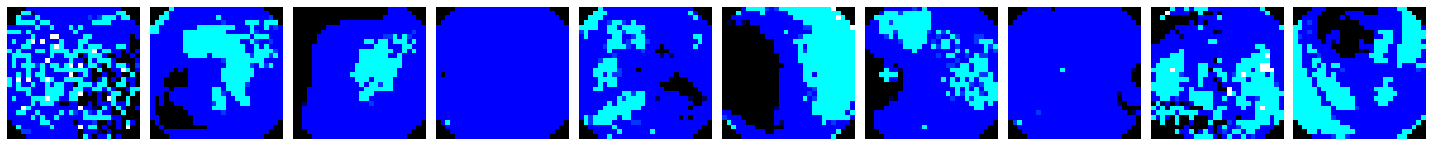

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

In [ ]:
plotImages(imgs)
print(labels)

**ESTRUCTURAS DE MODELO**

In [ ]:
mD1 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)),
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])


# A cambiar, aádir Dropout y quizá cambiar número neuronas en las capas ocultas
mD2 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)),
        Dense(units=250, activation="relu"),
        Dropout(0.5),
        Dense(units=250, activation="relu"),
        Dropout(0.5),
        Dense(units=ncat, activation="softmax"),
])

mCNN1 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=ncat, activation="softmax"),
])


mCNN2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=ncat, activation="softmax"),
])

mCNN3 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(250, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])

mCNN4 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(250, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])


### MODELO QUE YA EXISTA VGG16 POR EJEMPLO

In [ ]:
print("MODELO CNN1")
mCNN1.summary()  #Resumen de características del modelo CNN1

print("MODELO CNN2")
mCNN2.summary()  #Resumen de características del modelo CNN2

print("MODELO CNN3")
mCNN3.summary()  #Resumen de características del modelo CNN3

print("MODELO CNN4")
mCNN4.summary()  #Resumen de características del modelo CNN4


In [ ]:
mD1.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mD2.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN1.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN2.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN3.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN4.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard # Importamos TensorBoard
# Esta herramienta ayudará a poder valorar la puesta en escena de cada modelo

In [ ]:
print("MODELO 10C D1")
tensorboardD1 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/D1")
HistD1 = mD1.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardD1])

print("MODELO 10C D2")
tensorboardD2 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/D2")
HistD2 = mD2.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardD2])


print("MODELO 10C CNN1")
tensorboardCNN1 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/CNN1")
HistCNN1 = mCNN1.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardCNN1])

print("MODELO 10C CNN2")
tensorboardCNN2 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/CNN2")
HistCNN2 = mCNN2.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardCNN2])

print("MODELO 10C CNN3")
tensorboardCNN3 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/CNN3")
HistCNN3 = mCNN3.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardCNN3])

print("MODELO 10C CNN4")
tensorboardCNN4 = TensorBoard(log_dir="/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/10C/CNN4")
HistCNN4 = mCNN4.fit(
    train_generator, 
    validation_data = valid_generator,
    epochs = 10,
    callbacks=[tensorboardCNN4])

MODELO 2C D1
Epoch 1/10
185/185 [==============================] - 133s 719ms/step - loss: 0.1794 - accuracy: 0.9419 - val_loss: 0.2006 - val_accuracy: 0.9338
Epoch 2/10
185/185 [==============================] - 133s 721ms/step - loss: 0.1835 - accuracy: 0.9403 - val_loss: 0.2245 - val_accuracy: 0.9361
Epoch 3/10
185/185 [==============================] - 132s 714ms/step - loss: 0.1752 - accuracy: 0.9431 - val_loss: 0.2057 - val_accuracy: 0.9383
Epoch 4/10
185/185 [==============================] - 132s 716ms/step - loss: 0.1705 - accuracy: 0.9460 - val_loss: 0.2185 - val_accuracy: 0.9334
Epoch 5/10
185/185 [==============================] - 133s 720ms/step - loss: 0.1740 - accuracy: 0.9434 - val_loss: 0.2098 - val_accuracy: 0.9369
Epoch 6/10
 16/185 [=>............................] - ETA: 59s - loss: 0.1648 - accuracy: 0.9452 

In [ ]:
print("MODELO 2C D1")
Pred_mD1 = mD1.predict(valid_generator, verbose=1)

print("MODELO 2C D2")
Pred_mD2 = mD2.predict(valid_generator, verbose=1)

print("MODELO 2C CNN1")
Pred_mCNN1 = mCNN1.predict(valid_generator, verbose=1)

print("MODELO 2C CNN2")
Pred_mCNN2 = mCNN2.predict(valid_generator, verbose=1)

print("MODELO 2C CNN3")
Pred_mCNN3 = mCNN3.predict(valid_generator, verbose=1)

print("MODELO 2C CNN4")
Pred_mCNN4 = mCNN4.predict(valid_generator, verbose=1)

MODELO 2C D1
185/185 [==============================] - 67s 361ms/step
MODELO 2C D2
185/185 [==============================] - 66s 359ms/step
MODELO 2C CNN1
185/185 [==============================] - 66s 356ms/step
MODELO 2C CNN2
185/185 [==============================] - 66s 356ms/step
MODELO 2C CNN3
185/185 [==============================] - 67s 362ms/step
MODELO 2C CNN4
185/185 [==============================] - 66s 356ms/step


In [ ]:
for i in Pred_mD1:
  print(i)     ## printea un vector --> 1er elemento: probabilidad de que pase el primer caso (Sano), 2o elemento: probabilidad de que pase el segundo caso (Anomalia)

rounded_Pred_mD1 = np.argmax(Pred_mD1, axis=-1)

for i in Pred_mD1:
  print(i)     ## pintea un escalar que indica el número de índice del vector anterior con el valor más alto

In [ ]:
## GENERAR MATRIZ DE CONFUSIÓN --> VER EL VIDEO



In [ ]:
## GUARDAR EL MODELO COMPLETO: PARAMETROS, PESOS, TODO

if os.path.isfile("/content/drive/MyDrive/Data_Science/Capstone_Project/Resultados_Modelos/2C/D1/2C_model_D1.h5") is False:
  mD1.save("RUTA/2C_model.h5")

In [ ]:
## CARGAR EL MODEL COMPLETO

from tensorflow.keras.models import load_model
new_model = load_model("RUTA/2C_model.h5")